In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import roc_auc_score, matthews_corrcoef
import os
from os.path import join
import pandas as pd
import torch
CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('CCB_plot_style_0v4.mplstyle');
c_styles      = mpl.rcParams['axes.prop_cycle'].by_key()['color']   # fetch the defined color styles
high_contrast = ['#004488', '#DDAA33', '#BB5566', '#000000']


Bad key text.latex.preview in file CCB_plot_style_0v4.mplstyle, line 55 ('text.latex.preview  : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file CCB_plot_style_0v4.mplstyle, line 63 ('mathtext.fallback_to_cm : True ## When True, use symbols from the Computer Modern fonts')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.5/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


/Users/vahidatabaigi/ESP_new/notebooks_and_code


### ROC-AUC score:

In [7]:
y_test_pred_esm1b_ts_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP.npy"))
test_y_esm1b_ts_ecfp =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP.npy"))
y_test_pred_esm1b_ts_gnn =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_GNN_pretrained.npy"))
test_y_esm1b_ts_gnn =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_GNN_pretrained.npy"))

y_test_pred_esm1b_ts_ecfp_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP_1DRand.npy"))
test_y_esm1b_ts_ecfp_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP_1DRand.npy"))
y_test_pred_esm1b_ts_gnn_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_GNN_pretrained_1DRand.npy"))
test_y_esm1b_ts_gnn_1DRand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_GNN_pretrained_1DRand.npy"))


y_test_pred_esm1b_ts_ecfp_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1e.npy"))
test_y_esm1b_ts_ecfp_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP_C1e.npy"))
y_test_pred_esm1b_ts_gnn_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_GNN_pretrained_C1e.npy"))
test_y_esm1b_ts_gnn_C1e =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_GNN_pretrained_C1e.npy"))

y_test_pred_esm1b_ts_ecfp_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP_C1f.npy"))
test_y_esm1b_ts_ecfp_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP_C1f.npy"))
y_test_pred_esm1b_ts_gnn_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_GNN_pretrained_C1f.npy"))
test_y_esm1b_ts_gnn_C1f =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_GNN_pretrained_C1f.npy"))

y_test_pred_esm1b_ts_gnn_C2 =  np.load(join(CURRENT_DIR, ".." ,"data","training_results","y_test_pred_xgboost_ESM1b_ts_GNN_pretrained_C2.npy"))
test_y_esm1b_ts_gnn_C2 =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results",  "y_test_true_xgboost_ESM1b_ts_GNN_pretrained_C2.npy"))
y_test_pred_esm1b_ts_ecfp_C2 =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP_C2.npy"))
test_y_esm1b_ts_ecfp_C2 =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP_C2.npy"))

y_test_pred_esm1b_ts_gnn_C2Rand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results","y_test_pred_xgboost_ESM1b_ts_GNN_pretrained_C2Rand.npy"))
test_y_esm1b_ts_gnn_C2Rand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_GNN_pretrained_C2Rand.npy"))
y_test_pred_esm1b_ts_ecfp_C2Rand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP_C2Rand.npy"))
test_y_esm1b_ts_ecfp_C2Rand =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP_C2Rand.npy"))

y_test_pred_esm1b_ts_ecfp_mev =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_pred_xgboost_ESM1b_ts_ECFP_mev.npy"))
test_y_esm1b_ts_ecfp_mev =  np.load(join(CURRENT_DIR, ".." ,"data", "training_results", "y_test_true_xgboost_ESM1b_ts_ECFP_mev.npy"))

In [8]:
fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp, y_test_pred_esm1b_ts_ecfp)
roc_auc_esm1b_ts_ecfp = metrics.auc(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp)
fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn, y_test_pred_esm1b_ts_gnn)
roc_auc_esm1b_ts_gnn = metrics.auc(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn)

fpr_esm1b_ts_ecfp_1DRand, tpr_esm1b_ts_ecfp_1DRand, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_1DRand, y_test_pred_esm1b_ts_ecfp_1DRand)
roc_auc_esm1b_ts_ecfp_1DRand = metrics.auc(fpr_esm1b_ts_ecfp_1DRand, tpr_esm1b_ts_ecfp_1DRand)
fpr_esm1b_ts_gnn_1DRand, tpr_esm1b_ts_gnn_1DRand, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_1DRand, y_test_pred_esm1b_ts_gnn_1DRand)
roc_auc_esm1b_ts_gnn_1DRand = metrics.auc(fpr_esm1b_ts_gnn_1DRand, tpr_esm1b_ts_gnn_1DRand)

fpr_esm1b_ts_ecfp_C1e, tpr_esm1b_ts_ecfp_C1e, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1e, y_test_pred_esm1b_ts_ecfp_C1e)
roc_auc_esm1b_ts_ecfp_C1e = metrics.auc(fpr_esm1b_ts_ecfp_C1e, tpr_esm1b_ts_ecfp_C1e)
fpr_esm1b_ts_gnn_C1e, tpr_esm1b_ts_gnn_C1e, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1e, y_test_pred_esm1b_ts_gnn_C1e)
roc_auc_esm1b_ts_gnn_C1e = metrics.auc(fpr_esm1b_ts_gnn_C1e, tpr_esm1b_ts_gnn_C1e)


fpr_esm1b_ts_ecfp_C1f, tpr_esm1b_ts_ecfp_C1f, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C1f, y_test_pred_esm1b_ts_ecfp_C1f)
roc_auc_esm1b_ts_ecfp_C1f = metrics.auc(fpr_esm1b_ts_ecfp_C1f, tpr_esm1b_ts_ecfp_C1f)
fpr_esm1b_ts_gnn_C1f, tpr_esm1b_ts_gnn_C1f, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C1f, y_test_pred_esm1b_ts_gnn_C1f)
roc_auc_esm1b_ts_gnn_C1f = metrics.auc(fpr_esm1b_ts_gnn_C1f, tpr_esm1b_ts_gnn_C1f)


fpr_esm1b_ts_ecfp_C2, tpr_esm1b_ts_ecfp_C2, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C2, y_test_pred_esm1b_ts_ecfp_C2)
roc_auc_esm1b_ts_ecfp_C2 = metrics.auc(fpr_esm1b_ts_ecfp_C2, tpr_esm1b_ts_ecfp_C2)
fpr_esm1b_ts_gnn_C2, tpr_esm1b_ts_gnn_C2, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C2, y_test_pred_esm1b_ts_gnn_C2)
roc_auc_esm1b_ts_gnn_C2 = metrics.auc(fpr_esm1b_ts_gnn_C2, tpr_esm1b_ts_gnn_C2)

fpr_esm1b_ts_ecfp_C2Rand, tpr_esm1b_ts_ecfp_C2Rand, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_C2Rand, y_test_pred_esm1b_ts_ecfp_C2Rand)
roc_auc_esm1b_ts_ecfp_C2Rand = metrics.auc(fpr_esm1b_ts_ecfp_C2Rand, tpr_esm1b_ts_ecfp_C2Rand)
fpr_esm1b_ts_gnn_C2Rand, tpr_esm1b_ts_gnn_C2Rand, threshold = metrics.roc_curve(test_y_esm1b_ts_gnn_C2Rand, y_test_pred_esm1b_ts_gnn_C2Rand)
roc_auc_esm1b_ts_gnn_C2Rand = metrics.auc(fpr_esm1b_ts_gnn_C2Rand, tpr_esm1b_ts_gnn_C2Rand)

fpr_esm1b_ts_ecfp_mev, tpr_esm1b_ts_ecfp_mev, threshold = metrics.roc_curve(test_y_esm1b_ts_ecfp_mev, y_test_pred_esm1b_ts_ecfp_mev)
roc_auc_esm1b_ts_ecfp_mev = metrics.auc(fpr_esm1b_ts_ecfp_mev, tpr_esm1b_ts_ecfp_mev)

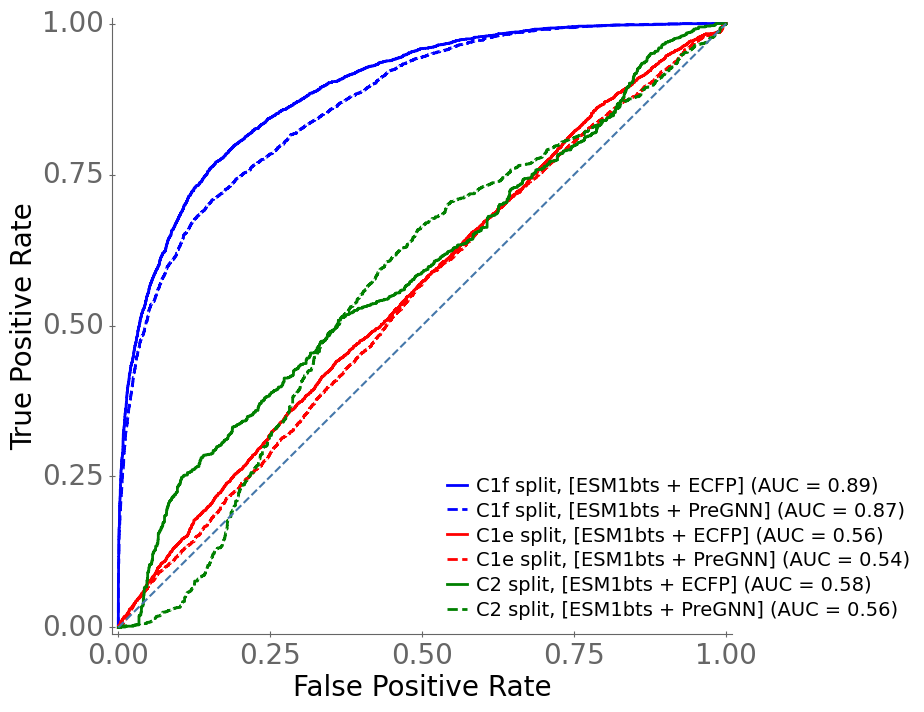

In [13]:
import matplotlib.pyplot as plt
from sklearn import metrics

def plot_roc_curve(fpr, tpr, roc_auc, label, linestyle='solid', color='blue'):
    plt.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})', linewidth=2.0, linestyle=linestyle)

fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 20})

# Define your data and labels here
data = [
    #(fpr_esm1b_ts_ecfp, tpr_esm1b_ts_ecfp, roc_auc_esm1b_ts_ecfp, 'ESM-$1b_{ts}$ + ECFP', 'solid', 'magenta'),
    #(fpr_esm1b_ts_gnn, tpr_esm1b_ts_gnn, roc_auc_esm1b_ts_gnn, 'ESM-$1b_{ts}$ + GNN', 'dashed', 'magenta'),
    
    #(fpr_esm1b_ts_ecfp_1DRand, tpr_esm1b_ts_ecfp_1DRand, roc_auc_esm1b_ts_ecfp_1DRand, 'ESM-$1b_{ts}$ + ECFP Random', 'solid', 'orange'),
    #(fpr_esm1b_ts_gnn_1DRand, tpr_esm1b_ts_gnn_1DRand, roc_auc_esm1b_ts_gnn_1DRand, 'ESM-$1b_{ts}$ + GNN Random', 'dashed', 'orange'),
    
    (fpr_esm1b_ts_ecfp_C1f, tpr_esm1b_ts_ecfp_C1f, roc_auc_esm1b_ts_ecfp_C1f, 'C1f split, [ESM1bts + ECFP]', 'solid', 'blue'),
    (fpr_esm1b_ts_gnn_C1f, tpr_esm1b_ts_gnn_C1f, roc_auc_esm1b_ts_gnn_C1f, 'C1f split, [ESM1bts + PreGNN]', 'dashed', 'blue'),

    (fpr_esm1b_ts_ecfp_C1e, tpr_esm1b_ts_ecfp_C1e, roc_auc_esm1b_ts_ecfp_C1e, 'C1e split, [ESM1bts + ECFP]', 'solid', 'red'),
    (fpr_esm1b_ts_gnn_C1e, tpr_esm1b_ts_gnn_C1e, roc_auc_esm1b_ts_gnn_C1e, 'C1e split, [ESM1bts + PreGNN]', 'dashed', 'red'),
    
    (fpr_esm1b_ts_ecfp_C2, tpr_esm1b_ts_ecfp_C2, roc_auc_esm1b_ts_ecfp_C2, 'C2 split, [ESM1bts + ECFP]', 'solid','green'),
    (fpr_esm1b_ts_gnn_C2, tpr_esm1b_ts_gnn_C2, roc_auc_esm1b_ts_gnn_C2,'C2 split, [ESM1bts + PreGNN]', 'dashed','green'),
    
    #(fpr_esm1b_ts_ecfp_C2Rand, tpr_esm1b_ts_ecfp_C2Rand,roc_auc_esm1b_ts_ecfp_C2Rand, 'ESM-$1b_{ts}$ + ECFP)_Random' , 'solid','black'),
    #(fpr_esm1b_ts_gnn_C2Rand, tpr_esm1b_ts_gnn_C2Rand, roc_auc_esm1b_ts_gnn_C2Rand, 'ESM-$1b_{ts}$ + GNN)_Random ', 'dashed','black')

    #(fpr_esm1b_ts_ecfp_mev, tpr_esm1b_ts_ecfp_mev, roc_auc_esm1b_ts_ecfp_mev, 'ESM-$1b_{ts}$ + ECFP_mev', 'solid', 'orange')

]
# Plot each ROC curve
for fpr, tpr, roc_auc, label, linestyle, color in data:
    plot_roc_curve(fpr, tpr, roc_auc, label, linestyle, color)

# Set axis parameters
ax.locator_params(axis="y", nbins=5)
ax.locator_params(axis="x", nbins=5)

# Set legend
plt.legend(loc='lower right', bbox_to_anchor=(1.30, 0.01), fontsize=14)
plt.plot([0, 1], [0, 1], '--')
eps = 0.01
plt.xlim([0 - eps, 1 + eps])
plt.ylim([0 - eps, 1 + eps])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


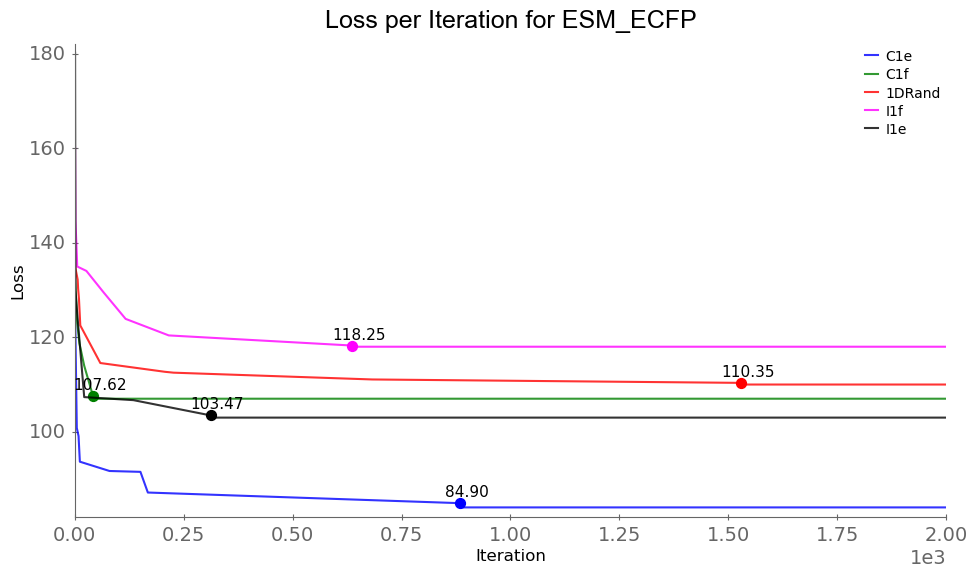

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

def parse_log(file_path):
    with open(file_path, 'r') as file:
        log_lines = file.readlines()

    iteration_data = []
    unique_losses = set()

    for line in log_lines:
        match_iteration = re.search(r'Iteration (\d+)', line)
        match_loss = re.search(r'Best loss so far: (\d+\.\d+)', line)

        if match_iteration:
            current_iteration = int(match_iteration.group(1))
        elif match_loss:
            current_loss = float(match_loss.group(1))

            # Check for unique loss in the same iteration
            if current_loss not in unique_losses:
                iteration_data.append({'iteration': current_iteration, 'loss': current_loss})
                unique_losses.add(current_loss)

    return pd.DataFrame(iteration_data)

log_directory = '/Users/vahidatabaigi/ESP_new/data/enzyme_substrate_data/1D_log/ECFP'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'1DRand': 'red', 'C1e': 'blue', 'C1f': 'green', 'I1e': 'black', 'I1f': 'magenta'}

fig, ax = plt.subplots(figsize=(10, 6))

for log_file in log_files:
    experiment_name = os.path.splitext(log_file)[0].split('Hyperparameter_optimization_ESM1bts_and_ECFP_')[1]
    color = color_map.get(experiment_name, 'gray')
    log_data = parse_log(os.path.join(log_directory, log_file))
    
    # Smooth the data using moving average
    window_size = min(20, max(1, len(log_data['iteration']) // 10))  # Adjust window size as needed
    smooth_loss = np.convolve(log_data['loss'], np.ones(window_size)/window_size, mode='same')
    smooth_iteration = log_data['iteration']

    # Convert smooth_iteration and smooth_loss to Pandas Series
    smooth_iteration = pd.Series(smooth_iteration)
    smooth_loss = pd.Series(smooth_loss)

    # Extend the curve to iteration 2000
    last_iteration = smooth_iteration.iloc[-1]
    remaining_iterations = np.arange(last_iteration + 1, 2001)
    extension_loss = np.full_like(remaining_iterations, smooth_loss.iloc[-1])
    smooth_iteration = smooth_iteration.append(pd.Series(remaining_iterations))
    smooth_loss = smooth_loss.append(pd.Series(extension_loss))

    # Plot smoothed data
    ax.plot(smooth_iteration, smooth_loss, color=color, label=experiment_name, alpha=0.8)

    # Find minimum loss point from original data
    min_loss_index = log_data['loss'].idxmin()
    min_loss_iteration = log_data['iteration'].iloc[min_loss_index]
    min_loss = log_data['loss'].iloc[min_loss_index]
    
    # Mark minimum loss point
    ax.scatter(min_loss_iteration, min_loss, color=color, s=50, marker='o')
    
    # Annotate minimum loss value
    ax.annotate(f'{min_loss:.2f}', (min_loss_iteration, min_loss), textcoords="offset points", xytext=(5,5), ha='center', fontsize=11)

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Loss per Iteration for ESM_ECFP', fontsize=18, fontname='Arial')
ax.set_xlim(0, 2000)
#ax.grid(True)  # Add grid lines
ax.legend(loc='upper right', fontsize=10)  # Place legend outside the plot

plt.tight_layout()
plt.show()



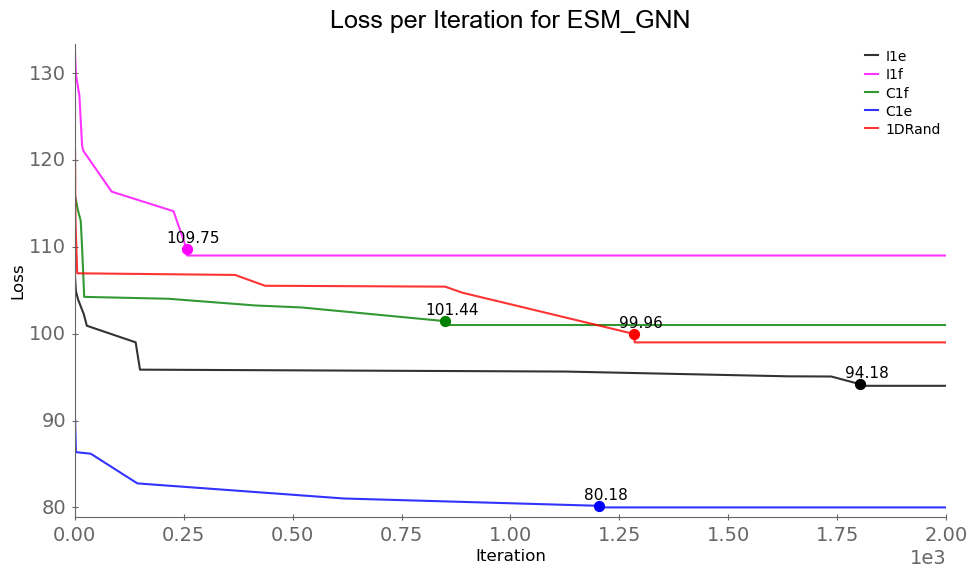

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

def parse_log(file_path):
    with open(file_path, 'r') as file:
        log_lines = file.readlines()

    iteration_data = []
    unique_losses = set()

    for line in log_lines:
        match_iteration = re.search(r'Iteration (\d+)', line)
        match_loss = re.search(r'Best loss so far: (\d+\.\d+)', line)

        if match_iteration:
            current_iteration = int(match_iteration.group(1))
        elif match_loss:
            current_loss = float(match_loss.group(1))

            # Check for unique loss in the same iteration
            if current_loss not in unique_losses:
                iteration_data.append({'iteration': current_iteration, 'loss': current_loss})
                unique_losses.add(current_loss)

    return pd.DataFrame(iteration_data)

log_directory = '/Users/vahidatabaigi/ESP_new/data/enzyme_substrate_data/1D_log/GNN'
log_files = [f for f in os.listdir(log_directory) if f.endswith('.log')]

color_map = {'1DRand': 'red', 'C1e': 'blue', 'C1f': 'green', 'I1e': 'black', 'I1f': 'magenta'}

fig, ax = plt.subplots(figsize=(10, 6))

for log_file in log_files:
    experiment_name = os.path.splitext(log_file)[0].split('Hyperparameter_optimization_ESM1bts_and_PreGNN_')[1]
    color = color_map.get(experiment_name, 'gray')
    log_data = parse_log(os.path.join(log_directory, log_file))
    
    # Smooth the data using moving average
    window_size = min(20, max(1, len(log_data['iteration']) // 10))  # Adjust window size as needed
    smooth_loss = np.convolve(log_data['loss'], np.ones(window_size)/window_size, mode='same')
    smooth_iteration = log_data['iteration']

    # Convert smooth_iteration and smooth_loss to Pandas Series
    smooth_iteration = pd.Series(smooth_iteration)
    smooth_loss = pd.Series(smooth_loss)

    # Extend the curve to iteration 2000
    last_iteration = smooth_iteration.iloc[-1]
    remaining_iterations = np.arange(last_iteration + 1, 2001)
    extension_loss = np.full_like(remaining_iterations, smooth_loss.iloc[-1])
    smooth_iteration = smooth_iteration.append(pd.Series(remaining_iterations))
    smooth_loss = smooth_loss.append(pd.Series(extension_loss))

    # Plot smoothed data
    ax.plot(smooth_iteration, smooth_loss, color=color, label=experiment_name, alpha=0.8)

    # Find minimum loss point from original data
    min_loss_index = log_data['loss'].idxmin()
    min_loss_iteration = log_data['iteration'].iloc[min_loss_index]
    min_loss = log_data['loss'].iloc[min_loss_index]
    
    # Mark minimum loss point
    ax.scatter(min_loss_iteration, min_loss, color=color, s=50, marker='o')
    
    # Annotate minimum loss value
    ax.annotate(f'{min_loss:.2f}', (min_loss_iteration, min_loss), textcoords="offset points", xytext=(5,5), ha='center', fontsize=11)

ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Loss', fontsize=12)
ax.set_title('Loss per Iteration for ESM_GNN', fontsize=18, fontname='Arial')
ax.set_xlim(0, 2000)
#ax.grid(True)  # Add grid lines
ax.legend(loc='upper right', fontsize=10)  # Place legend outside the plot

plt.tight_layout()
plt.show()
